# 결정트리


## 공통

In [2]:
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [3]:
from preamble import *

## 연습문제 01

### 연습문제01. load_iris 데이터를 로드하고, 데이터를 탐색하세요.
- 데이터셋의 특성과 타깃(target)의 개수를 확인하세요.
- 각 특성의 기초 통계 정보를 출력하세요.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(f"iris의 type : {type(iris)}")
print(f"iris.keys() = {iris.keys()}")
print(f"iris.data의 type : {type(iris.data)}")
targets, target_num = np.unique(iris.target, return_counts=True)
print(f"target = {targets}")
print(f"각 target별 개수 : {target_num}")
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.describe()

iris의 type : <class 'sklearn.utils._bunch.Bunch'>
iris.keys() = dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.data의 type : <class 'numpy.ndarray'>
target = [0 1 2]
각 target별 개수 : [50 50 50]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 연습문제01-2. 데이터를 학습 데이터와 테스트 데이터로 나누세요.
- 학습 데이터와 테스트 데이터의 크기를 출력하세요.
    - 데이터 분할은 train_test_split 함수를 사용하세요.
    - 학습 데이터와 테스트 데이터의 비율은 80:20으로 설정하세요.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 연습문제01-3. DecisionTreeClassifier를 사용하여 모델을 생성하세요.
- 학습 데이터를 사용하여 모델을 학습시키세요.
- 학습 완료 후, 학습 데이터에 대한 정확도를 출력하세요

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)
print(f"훈련 정확도 : {model.score(X_train, y_train)}")

훈련 정확도 : 0.9833333333333333


### 연습문제04. 학습된 모델을 사용하여 테스트 데이터를 예측하세요.
- 테스트 데이터에 대한 정확도를 출력하세요.
- classification_report를 사용하여 평가 결과를 상세히 출력하세요.

In [8]:
from sklearn.metrics import accuracy_score, classification_report
pred_y = model.predict(X_test)
print(f"예측 정확도 : {accuracy_score(pred_y, y_test)}")
print(classification_report(y_test, pred_y,
                            target_names=iris.target_names, zero_division=0))

예측 정확도 : 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 연습문제05. 학습된 결정 트리를 시각화하세요.
- plot_tree 함수를 사용하여 결정 트리의 구조를 그리세요.
- 트리 시각화를 통해 어떤 특성이 중요한지 설명하세요.

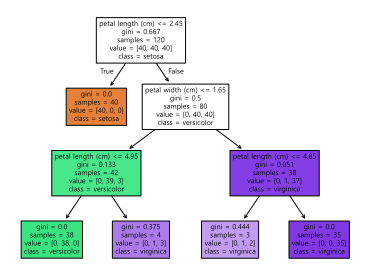

[0.    0.    0.579 0.421]


In [9]:
from sklearn.tree import plot_tree

plot_tree(model,
          class_names=iris.target_names,
          feature_names=iris.feature_names,
          filled=True)
plt.show()
print(model.feature_importances_)